<h2><font color="purple">Age Detection of Actors</font><br>
<h3><font color="brown">Group Members: Nikita Chaudhari,  Chetana Suthar, Sumedha Barve </font>

In this notebook, we create a convolutional neural net (CNN) classifier to classify multiple (3) classes of age.we focus on how to use couple of utility methods from the Keras (TensorFlow) 
Basically, we want to,

I)grab some data<br>
II)put them in a folder<br>
III)train a model<br>

The pictures are not of same size. However, they come organized neatly in three directories named with the corresponding class labels. We can take advantage of this organization and apply the Keras methods to streamline the training of our conv net.

Concretely, we will use the following utility classes/methods,<br>
A)ImageDataGenerator class<br>
B)flow_from_directory method of the ImageDataGenerator class<br>
C)fit_generator method (instead of plain vanila fit method) of Keras models<br>

<h4>The data collection is based on the movies(videos). The pictures are divided into three classes,</h4><br>

I)Middle<br>
II)Old<br>
III)Young<br>
For each class there are about 4000 photos. Photos are not high resolution. Photos are not reduced to a single size, they have different proportions.

In [1]:
import os


In [2]:
# Directory with middle pictures
middle_dir = os.path.join('training/middle')

# Directory with old pictures
old_dir = os.path.join('training/old')

# Directory with young pictures
young_dir = os.path.join('training/young')



In [3]:
train_middle_names = os.listdir(middle_dir)
print("middle age:" ,train_middle_names[:5])

train_old_names = os.listdir(old_dir)
print("old age: ",train_old_names[:5])

train_young_names = os.listdir(young_dir)
print("young age: ",train_young_names[:5])

middle age: ['0.jpg', '100.jpg', '10000.jpg', '10004.jpg', '10016.jpg']
old age:  ['1.jpg', '10011.jpg', '10013.jpg', '10019.jpg', '10040.jpg']
young age:  ['10001.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '10015.jpg']


In [4]:
print('total middle age images:', len(os.listdir(middle_dir)))
print('total old age images:', len(os.listdir(old_dir)))
print('total young age images:', len(os.listdir(young_dir)))

total middle age images: 10804
total old age images: 2396
total young age images: 6706


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some middle age pictures...



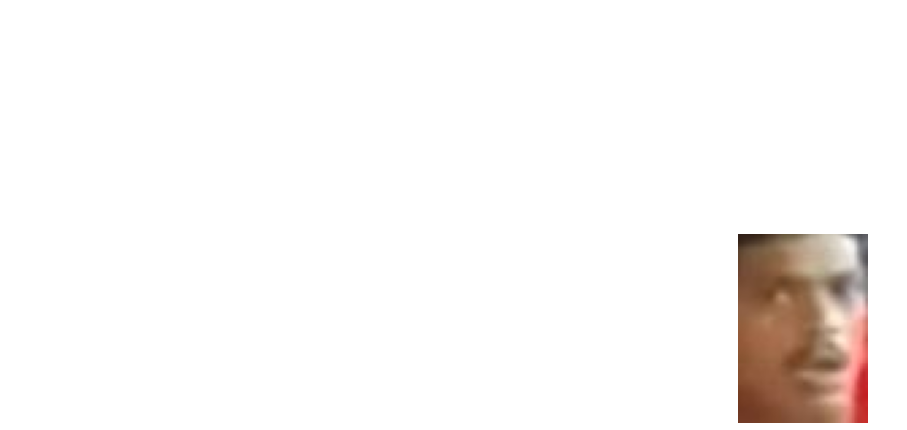

Showing some old pictures...



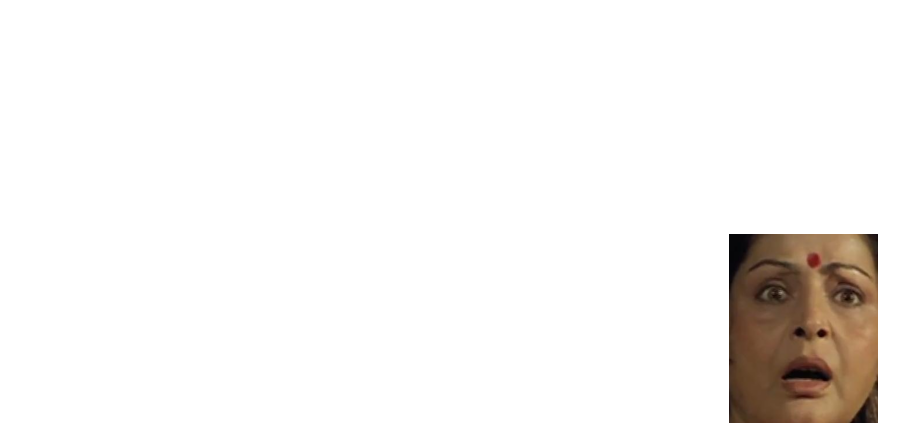

Showing some young pictures...



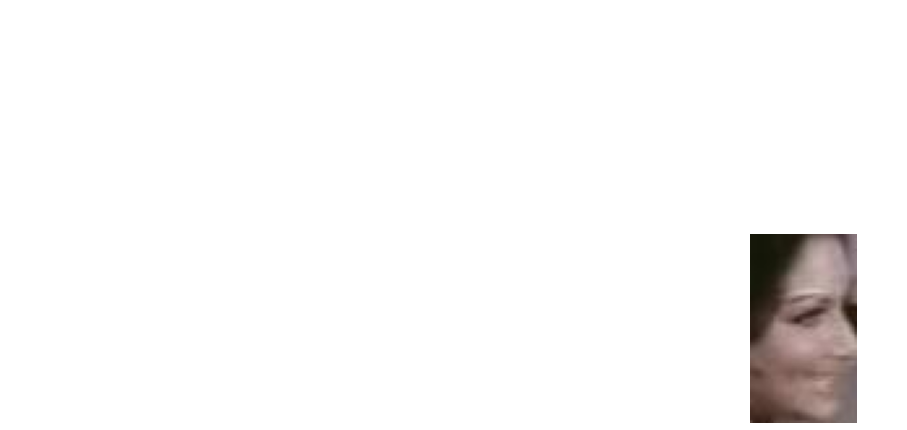

In [6]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_middle_pix = [os.path.join(middle_dir, fname) 
                for fname in train_middle_names[pic_index-8:pic_index]]
next_old_pix = [os.path.join(old_dir, fname) 
                for fname in train_old_names[pic_index-8:pic_index]]
next_young_pix = [os.path.join(young_dir, fname) 
                for fname in train_young_names[pic_index-8:pic_index]]


print ("Showing some middle age pictures...")
print()
for i, img_path in enumerate(next_middle_pix):
  # Set up subplot; subplot indices start at 1
      sp = plt.subplot(nrows, ncols, i + 1)
      sp.axis('Off') # Don't show axes (or gridlines)

img = mpimg.imread(img_path)
plt.imshow(img)

plt.show()

print ("Showing some old pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_old_pix):
  # Set up subplot; subplot indices start at 1
      sp = plt.subplot(nrows, ncols, i + 1)
      sp.axis('Off') # Don't show axes (or gridlines)

img = mpimg.imread(img_path)
plt.imshow(img)

plt.show()

print ("Showing some young pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_young_pix):
  # Set up subplot; subplot indices start at 1
      sp = plt.subplot(nrows, ncols, i + 1)
      sp.axis('Off') # Don't show axes (or gridlines)

img = mpimg.imread(img_path)
plt.imshow(img)

plt.show()

The official decription of the ImageDataGenerator class says "Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches)."

But the real utility of this class  method flow_from_directory which can pull image files one after another from the specified directory.

Note that, this directory just has to be the top-level directory where all the sub-directories of individual classes can be stored separately. The flow_from_directory method automatically scans through all the sub-directories and sources the images along with their appropriate labels.

Another useful argument is the target_size, which lets us resize the source images to a uniform size of 200 x 200, no matter the original size of the image. That is some cool image-processing right there with a simple function argument.

We also specify the batch size. If you leave batch_size unspecified, by default, it will be set to 32.

When we run this code, the Keras function scans through the top-level directory, finds all the image files, and automatically labels them with the proper class (based on the sub-directory they were in).

In [7]:
batch_size = 128


we provide the following arguments in the function,

train_directory: The directory where the training images are stored in separate folders. These folders should be named as per the classes.<br>
target_size: Target size for the training images. A tuple e.g. (200,200)<br>
classes: A Python list with the classes, for which we want the training to happen. This forces the generator choose specific files from the train_directory and not look at all the data.
batch_size: Batch size for training<br>
num_epochs: Number of epochs for training<br>
num_classes: Number of output classes to consider<br>
verbose: Verbosity level of the training, passed on to the fit_generator method<br>

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'training',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['middle','old','young'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 19906 images belonging to 3 classes.


In [9]:
train_generator.classes

array([0, 0, 0, ..., 2, 2, 2])

In [10]:
train_generator.class_indices

{'middle': 0, 'old': 1, 'young': 2}

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 3 output neurons for 3 classes with the softmax activation
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [16]:
total_sample=train_generator.n
print(total_sample)

19906


In [17]:
n_epochs = 30

Note the steps_per_epoch argument to fit_generator. This is a generic Python generator, it never stops and therefore will not know where a particular epoch is ending and the next one is starting. We have to let it know the steps in a single epoch.  The length of the total training sample divided by the batch size.

In the previous step, we found out the total sample size as total_sample. Therefore, in this particular case, the steps_per_epoch is set to int(total_sample/batch_size) which is 34. Therefore, you will see 34 steps per epoch in the training log below.

In [18]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 155 steps
Epoch 1/30
155/155 [==============================] - 663s 4s/step - loss: 0.9078 - acc: 0.5729
Epoch 2/30
155/155 [==============================] - 658s 4s/step - loss: 0.7812 - acc: 0.6601
Epoch 3/30
155/155 [==============================] - 644s 4s/step - loss: 0.7171 - acc: 0.6942
Epoch 4/30
155/155 [==============================] - 644s 4s/step - loss: 0.6676 - acc: 0.7158
Epoch 5/30
155/155 [==============================] - 639s 4s/step - loss: 0.6245 - acc: 0.7351
Epoch 6/30
155/155 [==============================] - 638s 4s/step - loss: 0.5787 - acc: 0.7574
Epoch 7/30
155/155 [==============================] - 817s 5s/step - loss: 0.5415 - acc: 0.7773
Epoch 8/30
155/155 [==============================] - 812s 5s/step - loss: 0.4991 - acc: 0.7943
Epoch 9/30
155/155 [==============================] - 646s 4s/step - loss: 0.4625 - acc: 0.8126
Epoch 10/30
155

C:\Users\NIKITA\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  


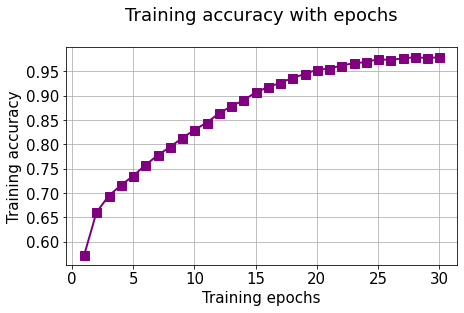

In [19]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9,color="purple",marker='s')
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

C:\Users\NIKITA\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  


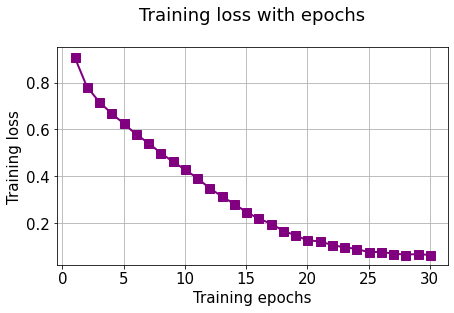

In [20]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9,color="purple",marker='s')
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<h3>Testing</h3><br>
Now we test our train_CNN function by simply supplying a folder/directory name and getting back a trained model which can be used for predictions!

Output cases:<br>
case 1: [1., 0., 0.]=Middle<br>
case 2: [0., 1., 0.]=Old<br>
case 3: [0., 0., 1.]=Young<br>


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/447.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[1., 0., 0.]], dtype=float32)

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/234.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[0., 0., 1.]], dtype=float32)

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/20.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[1., 0., 0.]], dtype=float32)

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/33.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[0., 1., 0.]], dtype=float32)

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/449.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[1., 0., 0.]], dtype=float32)

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/429.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[1., 0., 0.]], dtype=float32)

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/480.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[0., 0., 1.]], dtype=float32)

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/482.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[1., 0., 0.]], dtype=float32)

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/487.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[1., 0., 0.]], dtype=float32)

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/974.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[1., 0., 0.]], dtype=float32)

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('testing/989.jpg'
                   , target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
result

array([[0., 0., 1.]], dtype=float32)